## Notebook 3: Pre-Processing the data

### Introduction

 [Data preprocessing](http://www.cs.ccsu.edu/~markov/ccsu_courses/datamining-3.html) is a crucial step for any data analysis problem.  It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:
* Assigning numerical values to categorical data;
* Handling missing values; and
* Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).



In Notebook-2 [NB2_Exploratory data analysis](https://github.com/ShiroJean/Breast-cancer-risk-prediction/blob/master/NB2_ExploratoryDataAnalysis.ipynb). we explored the data, to help gain insight on the distribution of the data as well as how the attributes correlate to each other. we identified some features of interest. In this notebook I use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction. 

### Goal:
Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model. 

#### Load data and essential libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head()

#### Label encoding
Here, I assign the 30 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

In [2]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:31]
y = array[:,0]

In [3]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
#le.transform (['M', 'B'])

> *After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively*, illustrated by calling the transform method of LabelEncorder on two dummy variables.**


#### Assesing Model Accuracy: Split data into training and test sets

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will
* Split the available data into a training set and a testing set. (70% training, 30% test)
* Train the algorithm on the first part,
* make predictions on the second part and 
* evaluate the predictions against the expected results. 

The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.


In [4]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

#### Feature Standardization

* Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. 

* As seen in [NB2_Exploratory data analysis](https://github.com/ShiroJean/Breast-cancer-risk-prediction/blob/master/NB2_ExploratoryDataAnalysis.ipynb) the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.


Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one


In [5]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

#### Feature decomposition using Principal Component Analysis(  PCA)

From the pair plot in NB2, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions. I will use PCA



In [6]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

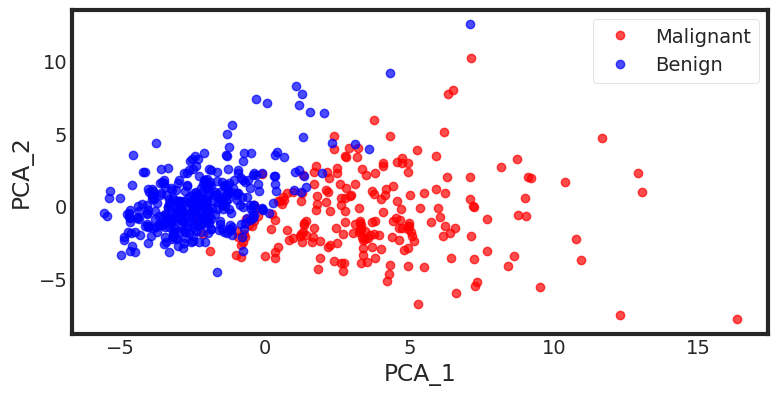

In [7]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are “most spread” along the new feature axes.



In [8]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

## Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. More about scree plot can be found [here](http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html), and [hear](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/) 

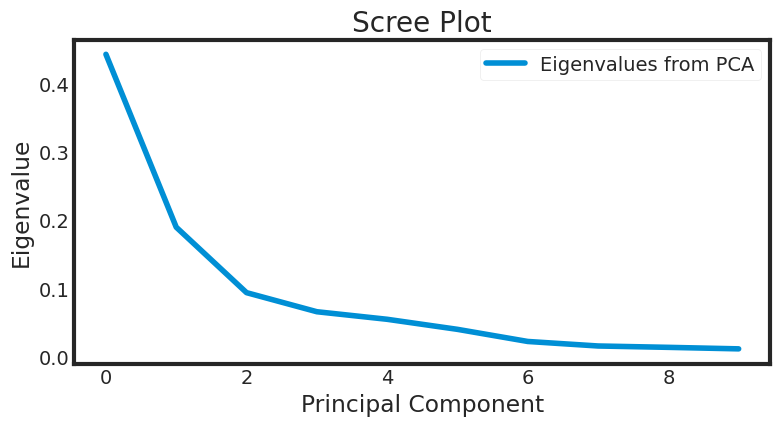

In [10]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

> #### Observation
The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

### A Summary of the Data Preprocing Approach used here:

1. assign features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers
2. Split data into training and test sets
3. Standardize the data.
4. Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix
5. Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the kk largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤dk≤d).
6. Construct the projection matrix W from the selected k eigenvectors.
7. Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.


It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give you an unbiased estimated of your model's true performance. Hence, in the next section you will first be introduced to cross-validation, before applying the PCA-based feature selection strategy in the model building pipeline.
